In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

In [4]:
df = pd.read_csv('CompleteDataset.csv')

In [5]:
df = df[['Age', 'Overall', 'Club', 'Wage', 'Special']] # выбираем указанные столбцы
d = df['Wage']
import re
patt = re.compile(r'€')
patt1 = re.compile(r'K')
d = [patt.sub('', item) for item in df.Wage]
df.Wage = [patt1.sub('', item) for item in d]
df.Wage = df.Wage.astype('int64') # переводим зарплату из строковой в целочисленную переменную

In [6]:
qage = [15, 25, 35, 48]
age = ['young', 'young adult', 'adult']
df["Age_group"] = pd.cut(df.Age, qage, labels=age)
df.head(10)

,Age,Overall,Club,Wage,Special,Age_group
0,32,94,Real Madrid CF,565,2228,young adult
1,30,93,FC Barcelona,565,2154,young adult
2,25,92,Paris Saint-Germain,280,2100,young
3,30,92,FC Barcelona,510,2291,young adult
4,31,92,FC Bayern Munich,230,1493,young adult
5,28,91,FC Bayern Munich,355,2143,young adult
6,26,90,Manchester United,215,1458,young adult
7,26,90,Chelsea,295,2096,young adult
8,27,90,Real Madrid CF,340,2165,young adult
9,29,90,Juventus,275,1961,young adult


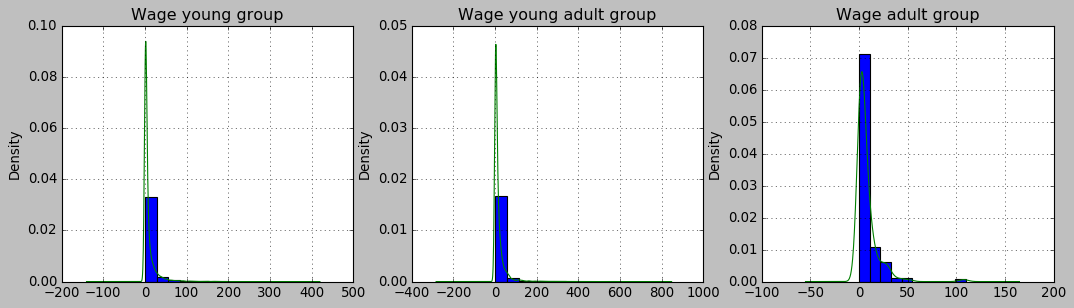

In [7]:
a = df.Wage[df['Age_group'] == 'young']
b = df.Wage[df['Age_group'] == 'young adult']
f = df.Wage[df['Age_group'] == 'adult']
dat = [a, b, f]

ax1 = plt.subplot2grid(shape=(1, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(1, 3), loc=(0, 2))
axes = [ax1, ax2, ax3]
colnames = ['Wage young group', 'Wage young adult group', 'Wage adult group']
i = 0
for i in range(len(dat)):
    dat[i].hist(density=True, ax=axes[i])
    dat[i].plot(kind='kde', ax=axes[i], figsize=(16, 4))
    axes[i].set_title(colnames[i])
    axes[i].grid()
    i+=1

### На рисунке распределение заработной платы в зависимости от возраста. Переменная Age была разбита на три возрастные группы (заголовки графиков). Мы видим, что наиболее оплачиваемые игроки - игроки среднего возраста (от 25 до 35). Распределения в группах практически одинаковое